In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

In [2]:
# Generate Synthetic Time Series Data
np.random.seed(42)
time_index = pd.date_range(start='2020-01-01', periods=100, freq='D')  # 100 days
trend = np.linspace(10, 50, 100)  # Linear increasing trend
seasonality = 10 * np.sin(np.linspace(0, 6 * np.pi, 100))  # Sinusoidal seasonality
noise = np.random.normal(0, 2, 100)  # Random noise

In [3]:
# Create a time series with trend, seasonality, and noise
time_series = trend + seasonality + noise

In [4]:
# Convert to Pandas DataFrame
df = pd.DataFrame({'Date': time_index, 'Value': time_series})
df.set_index('Date', inplace=True)

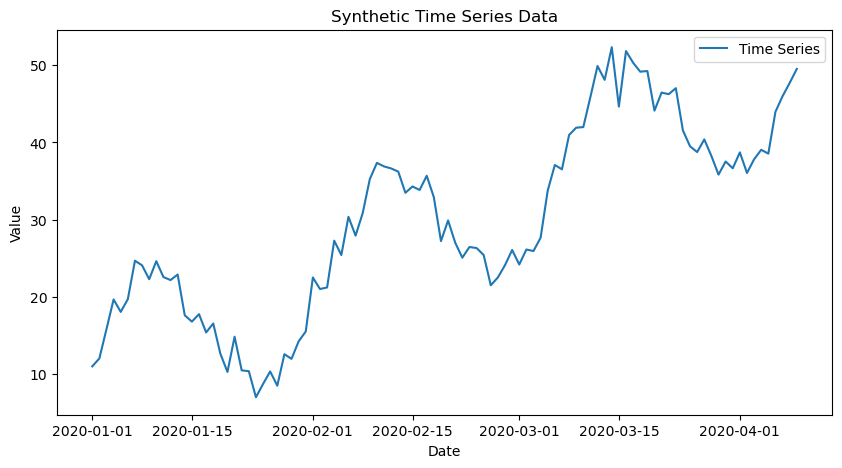

In [5]:
# Plot Time Series
plt.figure(figsize=(10, 5))
plt.plot(df, label='Time Series')
plt.title("Synthetic Time Series Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

In [6]:
# Moving Average Smoothing
df['MA_7'] = df['Value'].rolling(window=7).mean()

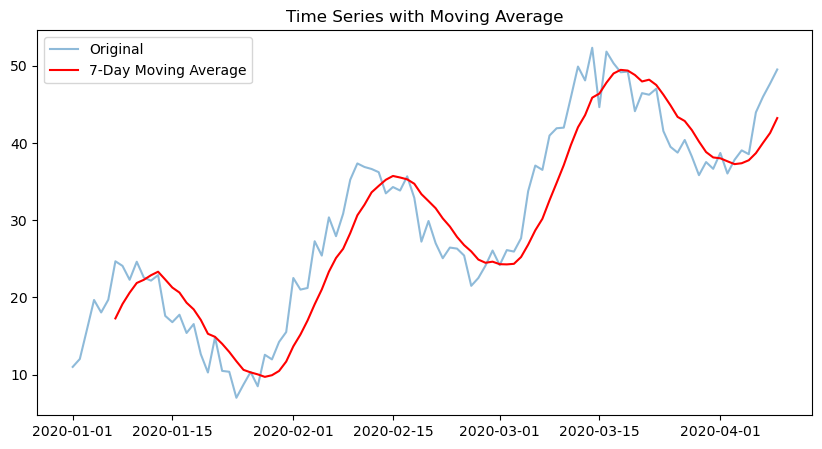

In [7]:
# Plot with Moving Average
plt.figure(figsize=(10, 5))
plt.plot(df['Value'], label='Original', alpha=0.5)
plt.plot(df['MA_7'], label='7-Day Moving Average', color='red')
plt.title("Time Series with Moving Average")
plt.legend()
plt.show()

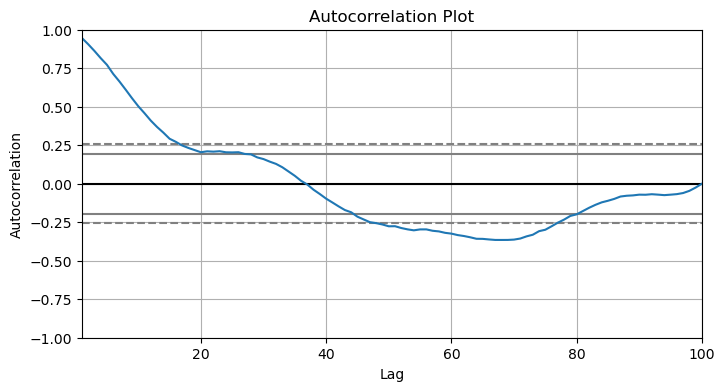

In [8]:
# Autocorrelation Plot
plt.figure(figsize=(8, 4))
autocorrelation_plot(df['Value'])
plt.title("Autocorrelation Plot")
plt.show()

In [9]:
# ARIMA Model for Forecasting
model = ARIMA(df['Value'], order=(2,1,2))  # ARIMA(p,d,q)
model_fit = model.fit()
forecast = model_fit.forecast(steps=10)  # Predict next 10 days

C:\Users\sandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\sandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\sandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\sandh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


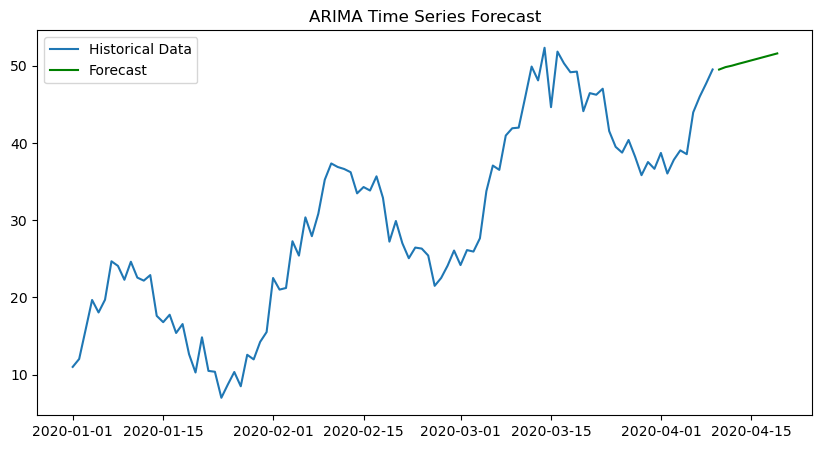

In [10]:
# Plot Forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Value'], label="Historical Data")
plt.plot(pd.date_range(df.index[-1], periods=11, freq='D')[1:], forecast, label="Forecast", color="green")
plt.title("ARIMA Time Series Forecast")
plt.legend()
plt.show()